In [1]:
import torch

epochs = 100
lr = 0.00001
train_batch_size = 32
test_batch_size = 1
ck_dir = 'checkpoint/hardnet'
device = torch.device('cuda')

In [2]:
TRAIN_PATH = './skin_leison/training'
TEST_PATH = './skin_leison/testing'

In [3]:
from torch.utils.data import DataLoader

from dataset import Skin_Leison

trainset = Skin_Leison(TRAIN_PATH)
testset = Skin_Leison(TEST_PATH)
trainloader = DataLoader(trainset, batch_size=train_batch_size, shuffle=True, num_workers=4)
testloader = DataLoader(testset, batch_size=test_batch_size, num_workers=4)

In [4]:
from torch import nn
from torch.optim import Adam

from models.HardMSEG import HarDMSEG

net = HarDMSEG().to(device)
optimizer = Adam(net.parameters(), lr=lr)
criterion = nn.BCELoss()

68 LOADED


In [5]:
from train import train

result = train(net, trainloader, testloader, epochs, optimizer, criterion, device=device, ck_dir=ck_dir)

/home/jiuk/miniconda3/envs/mlstudy/lib/python3.9/site-packages/torch/nn/functional.py:3454: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(


Epoch: 0, Train Loss: 0.5931289267539979, Test Loss: 0.6307963015139105
Saving model to checkpoint/hardnet/check0.pt
Epoch: 1, Train Loss: 0.46886987209320075, Test Loss: 0.39851095259189595
val_loss improved from 0.6308 to 0.3985, saving model to checkpoint/hardnet/check1.pt
Epoch: 2, Train Loss: 0.40517847776412963, Test Loss: 0.434176540374756
Epoch: 3, Train Loss: 0.3612131583690643, Test Loss: 0.351848355345428
val_loss improved from 0.3985 to 0.3518, saving model to checkpoint/hardnet/check3.pt
Epoch: 4, Train Loss: 0.3238001275062561, Test Loss: 0.542490710094571
Epoch: 5, Train Loss: 0.29938567042350767, Test Loss: 0.31454127807170174
val_loss improved from 0.3518 to 0.3145, saving model to checkpoint/hardnet/check5.pt
Epoch: 6, Train Loss: 0.28019958615303037, Test Loss: 0.3207672090828416
Epoch: 7, Train Loss: 0.2622610914707184, Test Loss: 0.2886925554275513
val_loss improved from 0.3145 to 0.2887, saving model to checkpoint/hardnet/check7.pt
Epoch: 8, Train Loss: 0.24059944

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(18,4))
keys = ['train_loss', 'test_loss', 'dice', 'vs', 'asd', 'hd']
for i, (col, key) in enumerate(zip(axes, keys)):
    col.plot(range(len(result[key])), result[key], label=key)
    col.set_title(key, fontsize=16)
    col.legend()
fig.tight_layout()

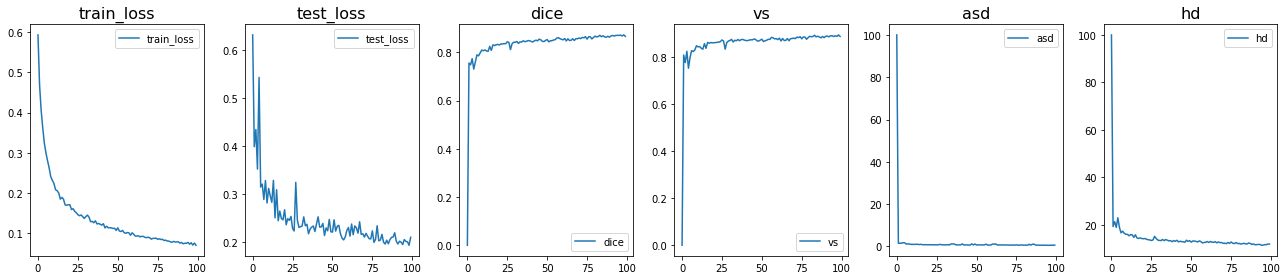

In [7]:
import json
from pathlib import Path

json_path = Path(ck_dir)/'result.json'
json_path.parent.mkdir(parents=True, exist_ok=True)
with open(json_path, 'w') as fp:
    json.dump(result, fp, sort_keys=True, indent=4)